In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import json
import pandas as pd
import time

import statsmodels.api as sm

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

from classes.helpers import *

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

data_folder = '../data/'
save_folder = '../figures/all/2-matching/'

func = [lambda x: np.percentile(x, 10), 
        lambda x: np.percentile(x, 25), 
        lambda x: np.percentile(x, 50), 
        lambda x: np.percentile(x, 75),
        lambda x: np.percentile(x, 90),
        lambda x: np.mean(x),
        lambda x: np.std(x)]

names = ['Quantile 10',
         'Quantile 25',
         'Quantile 50',
         'Quantile 75',
         'Quantile 90',
         'Average',
         'STD']

/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Sanity Check for the Matching

## Average rating

In [92]:
min_nbr_ratings = 5
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
matched = matched[(matched['ba']['nbr_ratings'] >= min_nbr_ratings) & (matched['rb']['nbr_ratings'] >= min_nbr_ratings)]

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['ba'] = df['ba'][df['ba']['nbr_ratings'] >= min_nbr_ratings]

df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')
df['rb'] = df['rb'][df['rb']['nbr_ratings'] >= min_nbr_ratings]

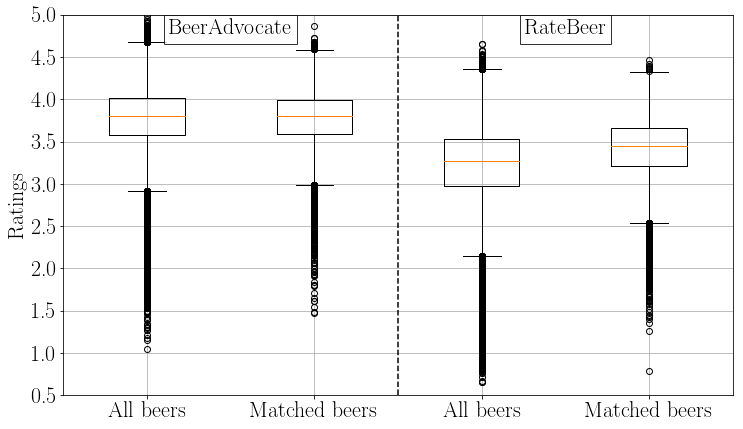

In [93]:
plt.figure(figsize=(12,7))
plt.rc('font', family='libertine')
plt.rc('font', size=22)
    
plt.boxplot([df['ba']['avg_computed'], matched['ba']['avg_computed'], df['rb']['avg_computed'], matched['rb']['avg_computed']], notch=False, showmeans=False, meanline=True)
plt.grid()
plt.ylabel('Ratings')
plt.plot([2.5, 2.5], [0.5, 5], 'k--')
plt.xticks([1, 2, 3, 4], ['All beers', 'Matched beers', 'All beers', 'Matched beers'])

plt.text(1.5, 4.94, 'BeerAdvocate', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.text(3.5, 4.94, 'RateBeer', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.ylim([0.5, 5])
plt.yticks(list(np.arange(0.5, 5.5, 0.5)), list(np.arange(0.5, 5.5, 0.5)))
plt.savefig(save_folder + 'boxplots_ratings.pdf', bbox_inches='tight')

## Number ratings per beer

In [83]:
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')

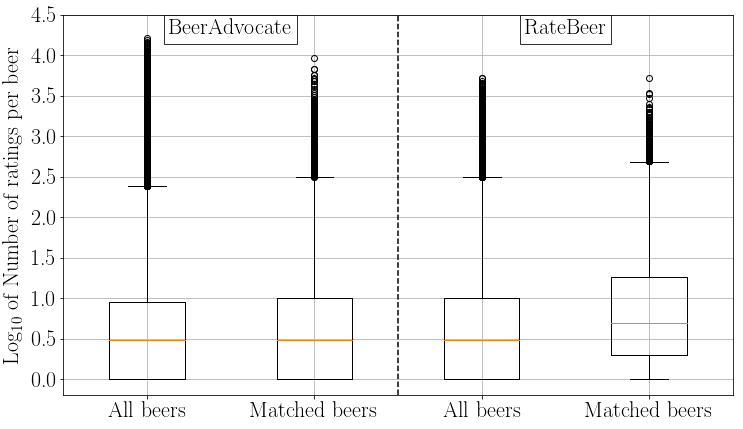

In [85]:
data = []
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_ratings'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_ratings'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))
    
# BOXPLOTS
plt.figure(figsize=(12,7))
plt.rc('font', family='libertine')
plt.rc('font', size=22)

plt.boxplot(data, notch=False, showmeans=False, meanline=True)
plt.grid()
plt.ylabel('Log$_{10}$ of Number of ratings per beer')

plt.plot([2.5, 2.5], [-0.2, 4.5], 'k--')
plt.xticks([1, 2, 3, 4], ['All beers', 'Matched beers', 'All beers', 'Matched beers'])
plt.text(1.5, 4.44, 'BeerAdvocate', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.text(3.5, 4.44, 'RateBeer', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.ylim([-0.2, 4.5])
plt.yticks(list(np.arange(0, 5, 0.5)), list(np.arange(0, 5, 0.5)))

plt.savefig(save_folder + 'boxplots_nbr_ratings.pdf', bbox_inches='tight')    

## Number beers per brewery

In [86]:
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])

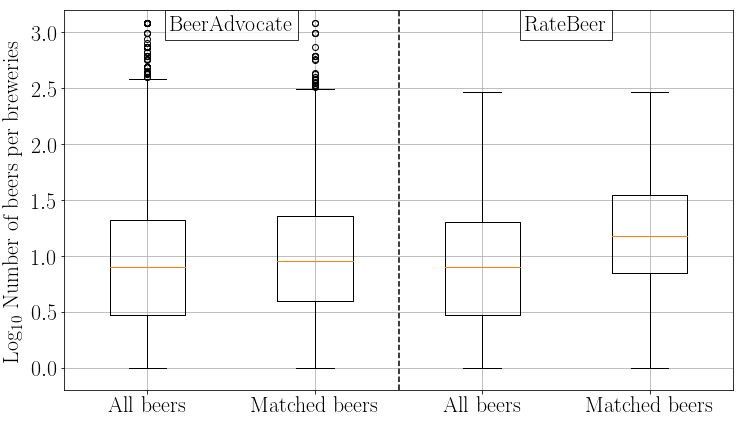

In [89]:
data = []
for key in df.keys():    
    
    arr1 = np.array(df[key]['nbr_beers'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_beers'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))

plt.figure(figsize=(12,7))
plt.rc('font', family='libertine')
plt.rc('font', size=22)

plt.boxplot(data, notch=False, showmeans=False, meanline=True)
plt.grid()
plt.ylabel('Log$_{10}$ Number of beers per breweries')

plt.plot([2.5, 2.5], [-0.2, 3.2], 'k--')
plt.xticks([1, 2, 3, 4], ['All beers', 'Matched beers', 'All beers', 'Matched beers'])
plt.text(1.5, 3.15, 'BeerAdvocate', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.text(3.5, 3.15, 'RateBeer', 
         horizontalalignment='center', verticalalignment='top',
         bbox={'facecolor':'white', 'alpha':0.8, 'pad':5})
plt.ylim([-0.2, 3.2])

plt.savefig(save_folder + 'boxplots_nbr_beers_breweries.pdf', bbox_inches='tight')    

## Numbers breweries per country

In [65]:
matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])
ba = pd.read_csv(data_folder + 'ba/breweries.csv')
rb = pd.read_csv(data_folder + 'rb/breweries.csv')

def perc_country(arr, country):
    locs = np.array(arr)
    spec = []
    for l in locs:
        if country in l:
            spec.append(l)

    return len(spec)/len(locs)*100

In [66]:
countries = ['United State', 'Germany', 'England', 'Canada', 'Italy', 'Belgium', 'France', 'Spain', 'Australia', 'Netherlands', 'Switzerland']
for c in countries:
    print('{}:'.format(c))
    print('  Unmatched:')
    print('    BA: {:.1f}'.format(perc_country(ba['location'], c)))
    print('    RB: {:.1f}'.format(perc_country(rb['location'], c)))
    print('  Matched:')
    print('    Both: {:.1f}'.format(perc_country(matched['ba']['location'], c)))
    print()


United State:
  Unmatched:
    BA: 44.4
    RB: 28.6
  Matched:
    Both: 47.8

Germany:
  Unmatched:
    BA: 8.5
    RB: 8.3
  Matched:
    Both: 6.4

England:
  Unmatched:
    BA: 6.1
    RB: 8.8
  Matched:
    Both: 5.8

Canada:
  Unmatched:
    BA: 5.1
    RB: 3.7
  Matched:
    Both: 4.9

Italy:
  Unmatched:
    BA: 2.2
    RB: 4.3
  Matched:
    Both: 2.7

Belgium:
  Unmatched:
    BA: 2.0
    RB: 1.9
  Matched:
    Both: 2.5

France:
  Unmatched:
    BA: 2.4
    RB: 3.5
  Matched:
    Both: 2.3

Spain:
  Unmatched:
    BA: 1.9
    RB: 3.2
  Matched:
    Both: 2.3

Australia:
  Unmatched:
    BA: 2.4
    RB: 2.3
  Matched:
    Both: 2.2

Netherlands:
  Unmatched:
    BA: 1.5
    RB: 2.2
  Matched:
    Both: 2.1

Switzerland:
  Unmatched:
    BA: 0.7
    RB: 2.2
  Matched:
    Both: 0.7



In [16]:
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
ba = pd.read_csv(data_folder + 'ba/beers.csv')

def perc_style(arr, style):
    locs = np.array(arr)
    spec = []
    for l in locs:
        if style in l:
            spec.append(l)

    return len(spec)/len(locs)*100

In [18]:
styles = ['American IPA', 'American Pale Ale (APA)', 'Saison / Farmhouse Ale', 'American Double / Imperial IPA',
          'American Wild Ale', 'American Amber / Red Ale', 'American Porter', 'American Stout', 'American Blonde Ale', 
         'Fruit / Vegetable Beer']
for s in styles:
    print('{}:'.format(s))
    print('  Unmatched: {:.1f}'.format(perc_style(ba['style'], s)))
    print('  Matched: {:.1f}'.format(perc_style(matched['ba']['style'], s)))
    print()

American IPA:
  Unmatched: 10.8
  Matched: 12.1

American Pale Ale (APA):
  Unmatched: 6.2
  Matched: 6.8

Saison / Farmhouse Ale:
  Unmatched: 5.0
  Matched: 5.9

American Double / Imperial IPA:
  Unmatched: 4.4
  Matched: 5.0

American Wild Ale:
  Unmatched: 3.2
  Matched: 3.4

American Amber / Red Ale:
  Unmatched: 3.1
  Matched: 3.1

American Porter:
  Unmatched: 3.3
  Matched: 3.0

American Stout:
  Unmatched: 2.6
  Matched: 2.6

American Blonde Ale:
  Unmatched: 2.0
  Matched: 2.3

Fruit / Vegetable Beer:
  Unmatched: 2.2
  Matched: 2.1



In [7]:
len(rb['style'].unique())

94

In [9]:
len(ba['style'].unique())

104